# Project: Titanic - Machine Learning from Disaster
![Image Description](TitanicShip.jpeg)

## Table of Contents
* [1. Introduction](#section1)
* [2. Loading the data](#section2)
* [3. Feature Classification: Categorical vs Numerical](#section3)
* [4. Distribution of feature values](#section4)
* [5. Exploratory Data Analysis (EDA)](#section5)
* [6. Feature Engineering & Data Wrangling](#section6)

## 1. Introduction <a id='section1'></a>
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## 2. Loading the data <a id='section2'></a>

In [1]:
#import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv(r".\Data\train.csv")
test_df = pd.read_csv(r".\Data\test.csv")

In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
#preview data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Set "PassengerId" as index column and make the change on the original DataFram train_df by set inplace = True
train_df.set_index(train_df.PassengerId, inplace = True)

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Delete column "PassengerId" and all its value (axis = 1), make changes on the train_df itself 
train_df.drop('PassengerId', axis = 1, inplace = True)

In [9]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [10]:
# another way to set index column for a DataFrame 
test_df = pd.read_csv(r".\Data\test.csv", index_col = "PassengerId")

In [11]:
# show the last 5 row in dataset
test_df.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


## 3. Feature Classification: Categorical vs Numerical <a id='section3'></a>
- This helps us select the appropriate plots for visualization.
### Which features are categorical?
- Categorical Features: nominal, ordinal, ratio, interval
- To classify the samples into sets of similar samples
### Which features are numerical?
- Numerical features: discrete, continuous, or timeseries
- These values change from sample to sample

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [13]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


- Categorical: Survived, Sex, Embarked, Pclass (ordinal), SibSp , Parch
- Embarked: Port of Embarkation - C = Cherbourg, Q = Queenstown, S = Southampton
- Numerical: (continuous) Age, Fare, (discrete)
- Mix types of data: Ticket, Cabin
- Contain Error/Typo: Name
- Blank or Null: Cabin > Age > Embarked
- Various Data Type: String, Int, Float

According to the data dictionary, we know that if a passernger is marked as 1, he or she survived. Clearly the number 1 or 0 is a flag for the person's survivorship. Yet the data type of the column is int64, which is a numerical type. We can change that with the following command.

In [14]:
train_df["Survived"] = train_df["Survived"].astype("category")

In [15]:
train_df["Survived"].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.6+ KB


In [17]:
features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
def convert_cat(df,features):
    for feature in features:
        df[feature] = df[feature].astype("category")
convert_cat(train_df, features)
convert_cat(test_df, features)
    

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


## 4. Distribution of feature values <a id='section4'></a>

### 4.1 Distribution of Numerical feature values across the samples

In [19]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


### 4.2. Distribution of Categorical features

In [20]:
# only describe the categorical columns
train_df.describe(include = ['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


## 5. Exploratory Data Analysis (EDA) <a id='section5'></a>

### 5.1. Correlating categorical features
- Categorical: Survived, Sex, Embarked, Pclass (ordinal), SibSp , Parch

### Target Variable: `Survived`

In [21]:
# Count total number of each value of Survived column
train_df["Survived"].value_counts().to_frame()

,Survived
0,549
1,342


In [22]:
# Calculate the percentage of each value of Survived column
train_df["Survived"].value_counts(normalize=True).to_frame()

,Survived
0,0.616162
1,0.383838


Only 38% survived the disaster. So the training data suffers from data imbalance but it is not severe which is why I will not consider techniques like **sampling data** to tackle the imbalance.

### Let's examine the `Sex` feature column

In [23]:
train_df["Sex"].value_counts().to_frame()

,Sex
male,577
female,314


In [24]:
# Create a cross-tabulation matrix
matrix_table = pd.crosstab(train_df["Survived"], train_df["Sex"])

# Display the matrix table
print(matrix_table)

Sex       female  male
Survived              
0             81   468
1            233   109


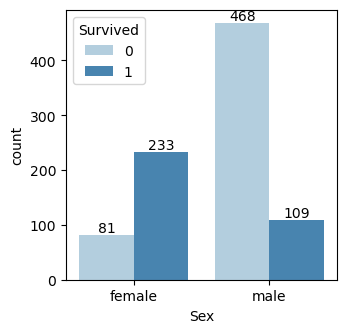

In [25]:
# display the matrix table on a chart

# Create the countplot with a smaller figure size
plt.figure(figsize=(3.5, 3.5))  # Adjust the width and height as needed

# Create the countplot
ax = sns.countplot(data=train_df, x='Sex', hue='Survived', palette = 'Blues')

# Add count labels to each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

### Remaining Categorical Feature Columns

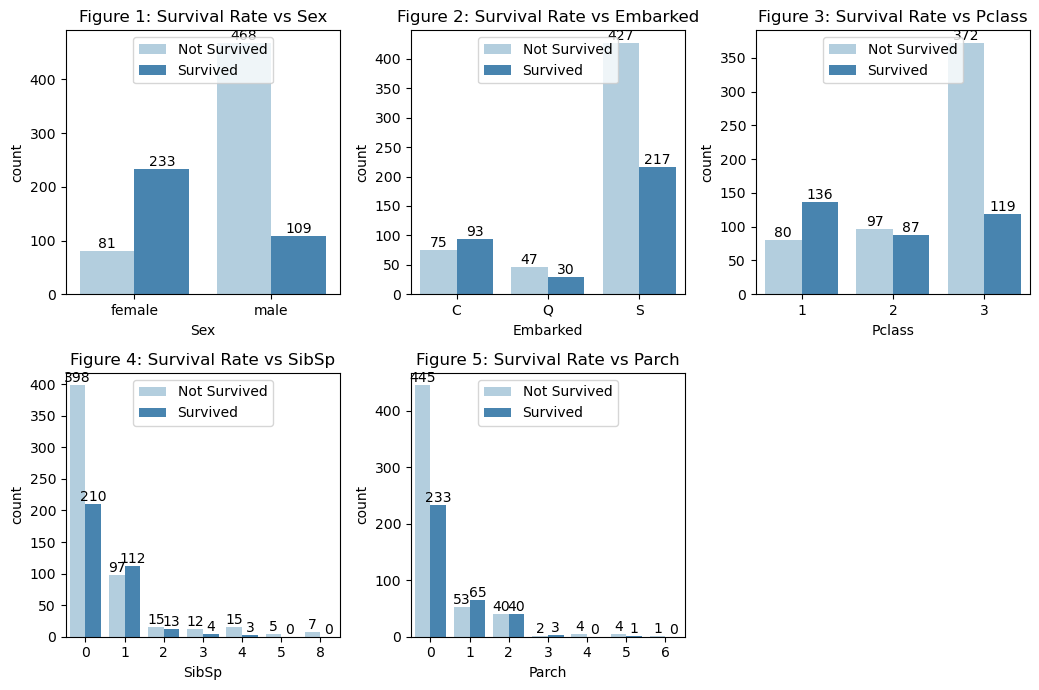

In [26]:
cols = ['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']

n_rows = 2
n_cols = 3

# Create a figure and a set of subplots and set width,height of figure = n_cols*3.5, n_rows*3.5
fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.5, n_rows*3.5))


for r in range(0,n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c #index to look through each of plot. c = 0,1,2,3,4,5,6,...
        if i<len(cols): # if i < 5 --> only process 5 plots 
            ax_i = ax[r,c]
            # draw the countplot for the ax_i, specify the subplot or ax object that we want to draw, in this case, we want to draw the ax_i subplot 
            sns.countplot(data=train_df, x=cols[i], hue='Survived', palette = 'Blues', ax=ax_i)
            ax_i.set_title(f"Figure {i+1}: Survival Rate vs {cols[i]}") #The f-string allows the inclusion of variables,funcs directly within the string
            ax_i.legend(title='', loc='upper center', labels = ["Not Survived", "Survived"])
            
            # Add count labels to each bar
            for p in ax_i.patches:
                ax_i.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

#Hide the last subplot in the figure
ax.flat[-1].set_visible(False) 

#fix overlapping issue by automatically adjust the spacing between subplots and other elements in a figure to ensure they fit properly within the figure.
plt.tight_layout()
plt.show() #show the figure out


### Observation:
#### - Survival Rate:
- Fig 1: Female survival rate > male
- Fig 2: Most People embarked on Southampton, and also had the highest people not survived
- Fig 3: 1st class higher survival rate
- Fig 4: People going with 0 SibSp are mostly not survived. the number of passenger with 1-2 family members has a better chance of survival
- Fig 5: People going with 0 Parch are mostly not survived

### 5.2. EDA for Numerical Features
- Numerical Features: (continuous) `Age`, `Fare`
#### Age

<Axes: xlabel='Age', ylabel='Count'>

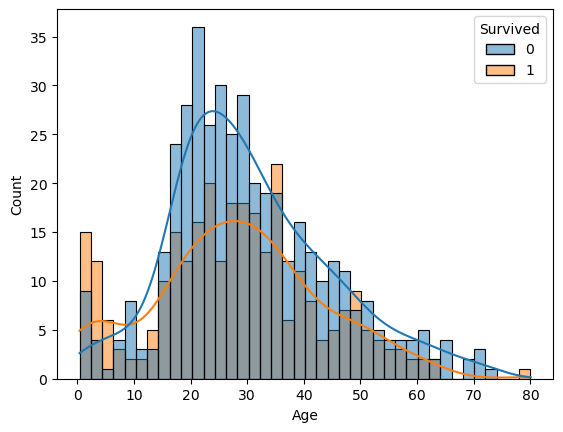

In [27]:
# use histogram plot for numerical features to count num of survival and non-survival people of each of age range
# num of bins/columns/bars in this plot will be 40
sns.histplot(data=train_df, x='Age', hue = 'Survived', bins = 40, kde = True)

### Observation:
- Most of passengers were died at the age of 18-36
- Majority passengers were died from 18-40 ages

In [28]:
train_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

### <span style="color:blue"> Observation </span>
- mean: the average value of ticket fares
- std: standard deviation compared to mean value is quite high --> this confirms that variability (mức độ biến động) of ticket fares among the passengers in the dataset vary significantly. A higher standard deviation indicates a greater spread of the data points, while a lower standard deviation indicates (biểu thị) a smaller spread
- 25% of ticket fares has values <= 7.910400
- 25% of ticket fares has values > 7.910400 and <= 14.454200 <b>OR</b> (50% of ticket fares <= 14.454200 and 50% of ticket fares > 14.454200)
- 25% of ticket fares has values > 14.454200 and <= 31.000000 <b>OR</b> (75% of ticket fares <= 31.000000 and 50% of ticket fares > 31.000000)
- 25% of ticket fares has values > 31.000000 and <= 512.329200 

<Axes: xlabel='Fare', ylabel='Count'>

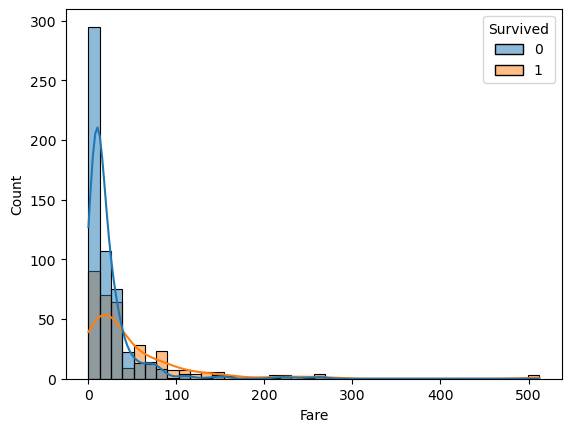

In [29]:
# use histogram plot for numerical features to count num of survival and non-survival people of ticket fare range
# num of bins/columns/bars in this plot will be 40
sns.histplot(data=train_df, x='Fare', hue = 'Survived', bins = 40, kde = True)

In [30]:
#To name for 0-25% quartile, 25-50, 50-75, 75-100
fare_categories = ['Economic', 'Standard', 'Expensive', 'Luxury']
pd.qcut(train_df['Fare'], 4, labels=fare_categories) # divide into 4 ranges
# in the below infor, the first passenger's ticket fare belongs to Economic range, the second pass's ticket fare belongs to Luxury range,...

PassengerId
1       Economic
2         Luxury
3       Standard
4         Luxury
5       Standard
         ...    
887     Standard
888    Expensive
889    Expensive
890    Expensive
891     Economic
Name: Fare, Length: 891, dtype: category
Categories (4, object): ['Economic' < 'Standard' < 'Expensive' < 'Luxury']

<Axes: xlabel='Fare', ylabel='count'>

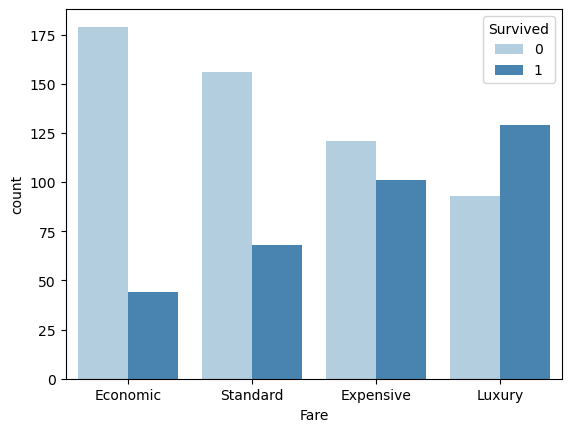

In [31]:
# let put the above data into a chart
quartile_data = pd.qcut(train_df['Fare'], 4, labels=fare_categories)
sns.countplot(x=quartile_data, hue = train_df['Survived'], palette='Blues')
#ax = sns.countplot(data=train_df, x='Sex', hue='Survived', palette = 'Blues')

In [32]:
train_df['Fare']

PassengerId
1       7.2500
2      71.2833
3       7.9250
4      53.1000
5       8.0500
        ...   
887    13.0000
888    30.0000
889    23.4500
890    30.0000
891     7.7500
Name: Fare, Length: 891, dtype: float64

- Distribution of Fare
    - Fare does not follow a normal distribution and has a huge spike at the price range `[0–100$]`.
    - The distribution is skewed (nghiên) to the left with `75%` of the fare paid under `$31` and a max paid fare of `$512`.
- Quartile plot:
    - Passenger with Luxury & Expensive Fare will have more chance to survive

## 6. Feature Engineering & Data Wrangling<a id='section6'></a>
### 6.1. Feature Engineering
#### Name
- Regular Expression

In [33]:
train_df["Name"].head()

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

In [34]:
train_df["Name"].tail(10)

PassengerId
882                          Markun, Mr. Johann
883                Dahlberg, Miss. Gerda Ulrika
884               Banfield, Mr. Frederick James
885                      Sutehall, Mr. Henry Jr
886        Rice, Mrs. William (Margaret Norton)
887                       Montvila, Rev. Juozas
888                Graham, Miss. Margaret Edith
889    Johnston, Miss. Catherine Helen "Carrie"
890                       Behr, Mr. Karl Howell
891                         Dooley, Mr. Patrick
Name: Name, dtype: object

In [35]:
import re # regular expression lib
def extract_title(name):
    p = re.compile(r", ([\w\s]+)\.") #create a pattern 
    #debug to find the error name
#     if p.search(name) is None:
#         print(name)
    return p.search(name).groups(1)[0].strip() #search that pattern in name and get back the first element(element 0) of group(1) and strip (remove) any leading or trailing whitespaces

#create a new feature/column named Title from column Name 
train_df['Title'] = train_df['Name'].apply(lambda name: extract_title(name))

# count the number of title
train_df['Title'].value_counts()
    

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [36]:
#search a specific text in column Name
train_df['Name'].str.contains('Mrs. Martin').sum()

1

In [37]:
# show the matched collumn Name
train_df[train_df['Name'].str.contains('Mrs. Martin')]['Name']

PassengerId
514    Rothschild, Mrs. Martin (Elizabeth L. Barrett)
Name: Name, dtype: object

In [38]:
#create a new feature/column named Title from column Name for test_df dataset
test_df['Title'] = test_df['Name'].apply(lambda name: extract_title(name))

# count the number of title
test_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

- <span style="color:blue">Most of title in <b>train_df</b> and __test_df__ are **Mr, Miss, Mrs, Master**</span>

In [39]:
# update some values of column Title 
# train_df['Title'].apply(lambda title: title if title in ['Mr','Miss','Mrs','Master'] else "Others")

# update some values of column Title using a function
def group_title(title):
    if title in ['Mr','Miss','Mrs','Master']:
        return title
    elif title == "Ms":
        return "Miss"
    else:
        return "Others"
train_df['Title'] = train_df['Title'].apply(lambda title: group_title(title))
train_df['Title'].value_counts()

Mr        517
Miss      183
Mrs       125
Master     40
Others     26
Name: Title, dtype: int64

In [40]:
#apply the same for test_df dataset
test_df['Title'] = test_df['Title'].apply(lambda title: group_title(title))
test_df['Title'].value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
Others      6
Name: Title, dtype: int64

<Axes: xlabel='Title', ylabel='count'>

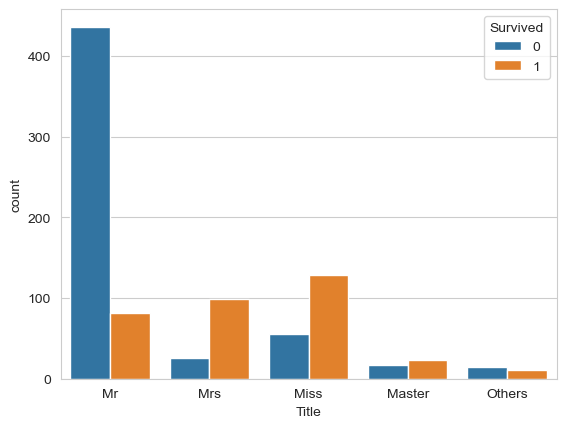

In [41]:
#set the style to include grid lines
sns.set_style('whitegrid')

#show Title data on a chart and count number of Survived and Not Survived
sns.countplot(data=train_df, x='Title', hue = 'Survived')

# Family
- `SibSp` and `Parch`

In [42]:
train_df['Family_Size'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') + 1

In [43]:
test_df['Family_Size'] = test_df['SibSp'].astype('int') + test_df['Parch'].astype('int') + 1 #for who went alone then return result = 1 instead of 0

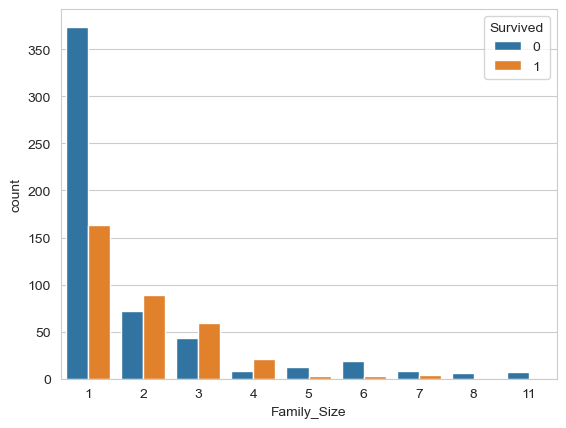

In [44]:
sns.countplot(data=train_df, x='Family_Size', hue = 'Survived');

In [45]:
#cut Family_Size into different ranges and set labels for ranges
train_df['Family_Cat'] = pd.cut(train_df['Family_Size'], bins = [0,1,4,6,20], labels = ['Solo','Small','Medium','Large']) # (0,1], (1,4], (4,6], (6,20]

#apply for test_df
test_df['Family_Cat'] = pd.cut(test_df['Family_Size'], bins = [0,1,4,6,20], labels = ['Solo','Small','Medium','Large']) # (0,1], (1,4], (4,6], (6,20]

<Axes: xlabel='Family_Cat', ylabel='count'>

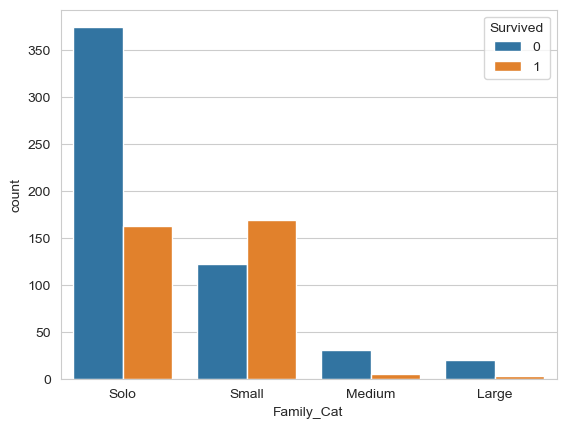

In [46]:
sns.countplot(data=train_df, x='Family_Cat', hue = 'Survived')

### 6.2 Data Wrangling (chuyển dữ liệu thô thành dữ liệu sẵn sàng để phân tích)

In [47]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     891 non-null    category
 1   Pclass       891 non-null    category
 2   Name         891 non-null    object  
 3   Sex          891 non-null    category
 4   Age          714 non-null    float64 
 5   SibSp        891 non-null    category
 6   Parch        891 non-null    category
 7   Ticket       891 non-null    object  
 8   Fare         891 non-null    float64 
 9   Cabin        204 non-null    object  
 10  Embarked     889 non-null    category
 11  Title        891 non-null    object  
 12  Family_Size  891 non-null    int32   
 13  Family_Cat   891 non-null    category
dtypes: category(7), float64(2), int32(1), object(4)
memory usage: 59.7+ KB


In [48]:
num_features = ['Age','Fare']
cat_features = ['Sex', 'Pclass','Embarked', 'Title','Family_Cat']
feature_cols = num_features + cat_features
print(feature_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_Cat']


In [49]:
def display_missing(df, feature_cols):
    num_rows = df.shape[0]
    for col in feature_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(f"Col {col} has {missing_count*100/num_rows:.2f}% missing values.") #round the percentage to 2 decimal digits
            
display_missing(train_df, feature_cols)

Col Age has 19.87% missing values.
Col Embarked has 0.22% missing values.


In [50]:
display_missing(test_df, feature_cols)

Col Age has 20.57% missing values.
Col Fare has 0.24% missing values.


### Filling missing values
#### Age
- Filling missing values with `median` of whole dataset

In [51]:
# group data by Sex and Pclass column, then get the median value at Age column 
age_by_sex_pclass = train_df.groupby(['Sex','Pclass']).median(numeric_only=True)['Age'] 

In [52]:
age_by_sex_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [53]:
#show data of column Sex, Pclass, Age where Age is missing value and grouped by Sex, Pclass column
missing_age_data = train_df[train_df['Age'].isnull()].groupby(['Sex', 'Pclass'])['Age'].first()

print(missing_age_data)

Sex     Pclass
female  1        NaN
        2        NaN
        3        NaN
male    1        NaN
        2        NaN
        3        NaN
Name: Age, dtype: float64


In [54]:
# show first 20 row data of column Sex, Pclass, Age before apply median values
subset = train_df[['Sex','Pclass','Age']].head(20)
print(subset)

                Sex Pclass   Age
PassengerId                     
1              male      3  22.0
2            female      1  38.0
3            female      3  26.0
4            female      1  35.0
5              male      3  35.0
6              male      3   NaN
7              male      1  54.0
8              male      3   2.0
9            female      3  27.0
10           female      2  14.0
11           female      3   4.0
12           female      1  58.0
13             male      3  20.0
14             male      3  39.0
15           female      3  14.0
16           female      2  55.0
17             male      3   2.0
18             male      2   NaN
19           female      3  31.0
20           female      3   NaN


In [55]:
# group dataset by Sex and Pclass columns, then set median value for Age column where its value is NA and then set back to Age column
train_df['Age'] = train_df.groupby(['Sex', 'Pclass'],group_keys=False)['Age'].apply(lambda x: x.fillna(x.median())) 


In [56]:
#apply for test_df
test_df['Age'] = test_df.groupby(['Sex', 'Pclass'],group_keys=False)['Age'].apply(lambda x: x.fillna(x.median())) 

In [57]:
# show first 20 row data of column Sex, Pclass, Age after apply median values
subset = train_df[['Sex','Pclass','Age']].head(20)
print(subset)

                Sex Pclass   Age
PassengerId                     
1              male      3  22.0
2            female      1  38.0
3            female      3  26.0
4            female      1  35.0
5              male      3  35.0
6              male      3  25.0
7              male      1  54.0
8              male      3   2.0
9            female      3  27.0
10           female      2  14.0
11           female      3   4.0
12           female      1  58.0
13             male      3  20.0
14             male      3  39.0
15           female      3  14.0
16           female      2  55.0
17             male      3   2.0
18             male      2  30.0
19           female      3  31.0
20           female      3  21.5


In [58]:
display_missing(train_df, feature_cols)
display_missing(test_df, feature_cols)

Col Embarked has 0.22% missing values.
Col Fare has 0.24% missing values.


In [59]:
X = train_df[feature_cols]
y = train_df['Survived']

In [60]:
X_test = test_df[feature_cols]

In [61]:
#preprocess pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler # OneHotEncoder is used for Categorical cols, StandardScaler is used for numerical cols
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline #mình cần Pipeline vì mình không những fill các missing value mà còn đưa những giá trị cột này về cùng 1 Scale đó chính là Standard Scaler

#write a Pipeline
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), #fill missing values by median values 
    ('scaler', StandardScaler() ) #then transform these data into one scale, scale data into the same range. The purpose of scaling the data is to ensure that all numerical features are on a similar scale, which can be beneficial for certain machine learning algorithms and models.
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore')) #to convert categorical values into numerical values. The purpose of one-hot encoding is to convert categorical variables into a format that can be used by machine learning algorithms, which typically require numerical inputs.
])

In [62]:
# define preprocessor function to preprocess the input data
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [63]:
#fit preprocessor with the trained data
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_Cat'])])

In [64]:
# let's transform X to fill the missing values. For numerical data, convert to the same scale. For categorical data, convert them into numerical data
X = preprocessor.transform(X) # X -> X_train for training model, X_val to validate model's performance 

In [65]:
 X_test = preprocessor.transform(X_test)

## 7. Model Training<a id='section7'></a>

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2) # use 20% of data for X_val and y_val 

In [68]:
# Check num of rows and cols in X_train and X_val
X_train.shape, X_val.shape, X_test.shape

((712, 19), (179, 19), (418, 19))

In [69]:
# the predicted data type is binary classification
from sklearn.preprocessing import PolynomialFeatures

#sklearn model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix

In [70]:
# Initialize the LogisticRegression instance
# use the liblinear solver algorithm to optimize the logistic regression model's parameters.
#the solver will iterate up to 1000 times to find the optimal solution.
log_reg = LogisticRegression(solver='liblinear', max_iter=1000) 
log_reg.fit(X_train, y_train) #fit the trained data into model to train model

LogisticRegression(max_iter=1000, solver='liblinear')

In [71]:
# calculate the score of X_val to evaluate the model's performance on the validation data. This can be used as a metric to evaluate how well the model is performing on unseen data.
# The score method calculates the mean accuracy of the model's predictions compared to the true target values (labels) of the validation data.
log_reg.score(X_val, y_val)

0.8547486033519553

 - Score when using LogisticRegression is 84.9%

In [72]:
y_pred = log_reg.predict(X_val)

In [73]:
#compare the precision of y_pred and y_val
precision_score(y_val, y_pred), recall_score(y_val, y_pred)

(0.8275862068965517, 0.75)

- Precision_score measures the model's ability to correctly identify positive samples out of **the samples predicted as positive (value 1 in binary)**
- recall_score measures the model's ability to correctly identify positive samples out of **all actual positive (value 1 in binary) samples.**
- The higher of Precision_score and recall_score, the better the model is

In [74]:
# generate a comprehensive report about all important metrics of class 0 and class 1
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       115
           1       0.83      0.75      0.79        64

    accuracy                           0.85       179
   macro avg       0.85      0.83      0.84       179
weighted avg       0.85      0.85      0.85       179



- y = a*x1 + b*x2 + bias -> y = a*x1^2 + b*x2^2 + c x1*x2 + bias # nâng bậc để đồ thị cong hơn

In [75]:
poly = PolynomialFeatures(degree=2)
poly_features_X_train = poly.fit_transform(X_train)
poly_features_X_val = poly.transform(X_val) # we don't want X_val to be involved in the training process so we don't use fit func

In [76]:
poly_log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
poly_log_reg.fit(poly_features_X_train, y_train) #train model using another algorithm (PolynomialFeatures)

LogisticRegression(max_iter=1000, solver='liblinear')

In [77]:
poly_log_reg.score(poly_features_X_val, y_val)

0.8435754189944135

- Score when using PolynomialFeatures model is 86.6%

In [78]:
#try some other classification model to see which model gives the prediction with the best accuracy 
# Decision Tree
decision_tree = DecisionTreeClassifier(criterion= 'entropy', max_depth=5, random_state=2022)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2022)

In [79]:
decision_tree.score(X_val, y_val)

0.7988826815642458

- Score when using DecisionTreeClassifier is 87.1%

### 7.1 Cross-validation

In [80]:
from sklearn.model_selection import cross_val_score

In [81]:
log_reg_cv = LogisticRegression(solver='liblinear', max_iter = 1000)
dt_cv = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2023)

#metric to measure/scoring is accuracy, devide training data into 5 folds/parts
lr_scores = cross_val_score(log_reg_cv,X,y,scoring='accuracy', cv=5) 

In [82]:
# print accuracy of each fold
lr_scores

array([0.83240223, 0.8258427 , 0.79775281, 0.81460674, 0.85955056])

In [83]:
# get the mean value of lr_scores and the deviation of the mean value
lr_scores.mean(), lr_scores.std()

(0.826031008725127, 0.020466357172416235)

- Mean value is 82.6% +/- 2%

In [84]:
#apply for DecisionTreeClassifier: metric to measure/scoring is accuracy, devide into 5 folds
dt_scores = cross_val_score(dt_cv,X,y,scoring='accuracy', cv=5) 

In [85]:
# print accuracy of each fold
dt_scores

array([0.77653631, 0.81460674, 0.8258427 , 0.79775281, 0.81460674])

In [86]:
# get the mean value of dt_scores and the deviation of the mean value
dt_scores.mean(), dt_scores.std()

(0.8058690603226415, 0.01719257924007743)

- Mean value is 80.7% +/- 1.5%

### 7.2 Baseline Model Comparision

In [87]:
# import models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier, RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn import tree

# Use Anaconda prompt to install this lib before import, enter the following command to install: conda install -c conda-forge xgboost
from xgboost import XGBClassifier

from sklearn import metrics
seed = 2023

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
#set a specific value for random_state to get the same predictive result when run model multiple times
# intialize model instances 
models = [
          LinearSVC(max_iter=12000,random_state=seed),
          SVC(random_state=seed),
          KNeighborsClassifier(metric='minkowski', p=2), #mertric để tính toán các khoảng cách
          LogisticRegression(random_state=seed),
          DecisionTreeClassifier(random_state=seed), 
          RandomForestClassifier(random_state=seed),
          ExtraTreesClassifier(),
          AdaBoostClassifier(),                 
          XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=seed),
]

In [ ]:
from sklearn.model_selection import StratifiedKFold
def generate_baseline_results(models, X, y, metrics, cv=5, plot_results=False):
    #define k-fold
    #devide training data into 5 parts equally, make class 0 and 1 at each fold is distributed equally 
    kfold = StratifiedKFold(cv,shuffle=True,random_state=seed) #shuffle=True: để đảo các fold
    entries = [] #save result in a list
    for model in models:
        model_name = model.__class__.__name__
#         print(model_name)
        scores = cross_val_score(model,X,y,scoring=metrics,cv=kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name,fold_idx,score))
            
    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_id', 'accuracy_score'])
    
    if plot_results:
        sns.boxplot(x='model_name', y='accuracy_score', data=cv_df, color='lightblue', showmeans=True)
        plt.title("Boxplot of Base-Line Model Accuracy using 5-fold cross-validation")
        plt.xticks(rotation=45)
        plt.show()
        
    #summary results
    mean = cv_df.groupby('model_name')['accuracy_score'].mean() #calculate mean on 'accuracy_score' column
    std = cv_df.groupby('model_name')['accuracy_score'].std()
    
    baseline_results = pd.concat([mean,std], axis=1, ignore_index=True)
    baseline_results.columns=['Mean','Standard Deviation']
    
    #sort by accuracy
    baseline_results.sort_values(by=['Mean'], ascending=False, inplace=True)
    
    return baseline_results

generate_baseline_results(models, X, y, metrics='accuracy', cv=5, plot_results=False)